In [1]:
GPT2_VERSION = 'gpt2-large'
STAT = 'bergsma'
FILTER = 'filtered'

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winogender_data/attention_intervention_{STAT}_{GPT2_VERSION}_{FILTER}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 26
Mean total effect: 0.350

INDIRECT Effect (mean = 0.00043955859489240145)
Top 10 heads:
   10 7: 0.040 (p=0.0000)
   16 5: 0.034 (p=0.0000)
   15 6: 0.030 (p=0.0000)
   16 19: 0.026 (p=0.0000)
   18 5: 0.024 (p=0.0000)
   12 14: 0.023 (p=0.0000)
   11 7: 0.015 (p=0.0000)
   8 5: 0.013 (p=0.0000)
   17 18: 0.011 (p=0.0000)
   11 1: 0.009 (p=0.0000)

DIRECT Effect (mean = 0.34934432940382476)
Top 10 heads:
   16 5: 0.300 (p=0.1532)
   10 7: 0.304 (p=0.1735)
   15 6: 0.312 (p=0.2202)
   12 14: 0.319 (p=0.2639)
   18 5: 0.323 (p=0.2943)
   11 1: 0.329 (p=0.3355)
   16 19: 0.334 (p=0.3727)
   11 7: 0.337 (p=0.3994)
   17 16: 0.337 (p=0.4016)
   19 3: 0.338 (p=0.4071)


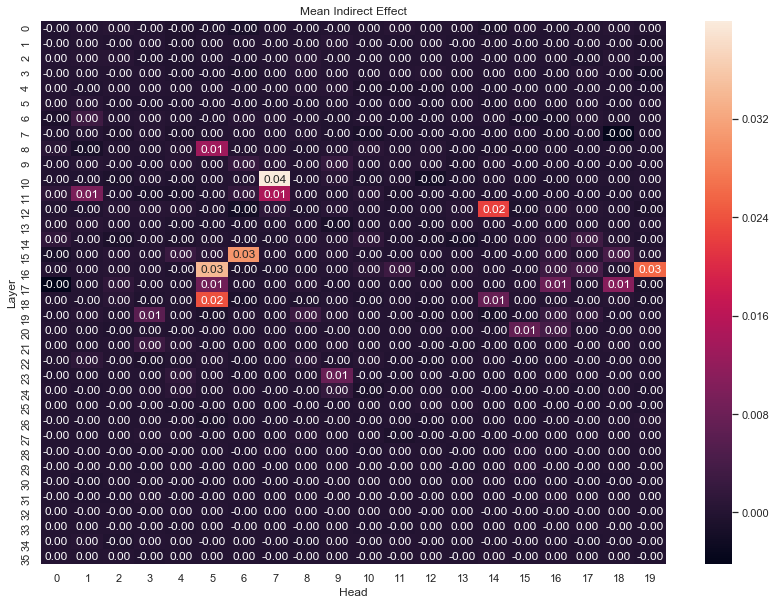

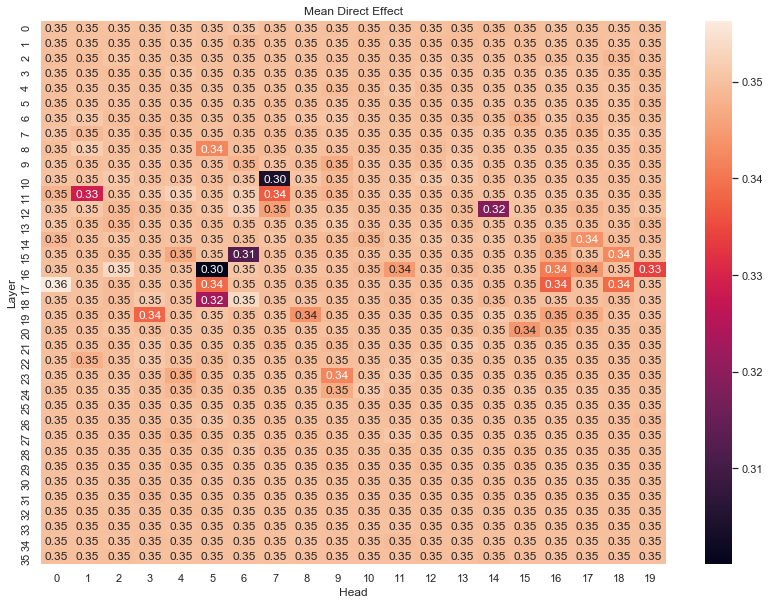

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 26
Mean total effect: 0.350


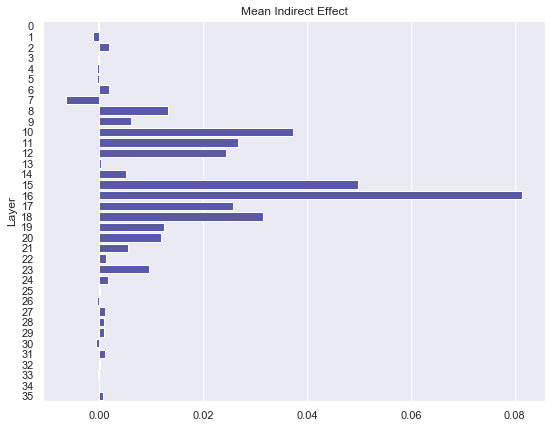

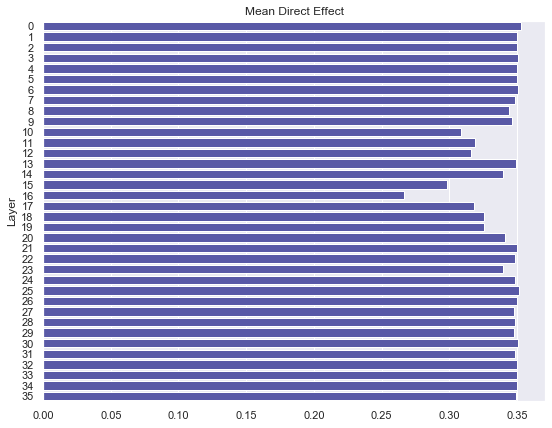

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The technician told the customer that she
x': The technician told the customer that he
c1: could pay with cash .
c2: had completed the repair .

p(c2|x) / p(c1|x) = 0.85243
p(c2|x') / p(c1|x') = 1.06184

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.246


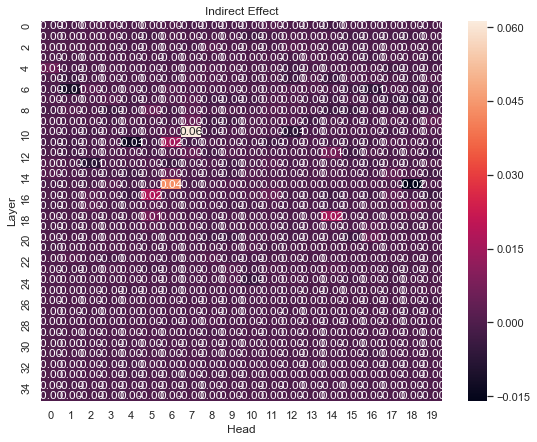

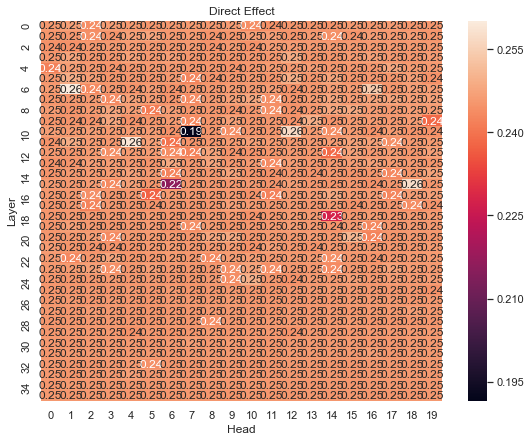

In [6]:
report_intervention(results[0])

x : The customer asked to speak with the manager because she
x': The customer asked to speak with the manager because he
c1: wanted to fix the billing error quickly .
c2: would be able to fix the billing error .

p(c2|x) / p(c1|x) = 2.15625
p(c2|x') / p(c1|x') = 2.46609

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.144


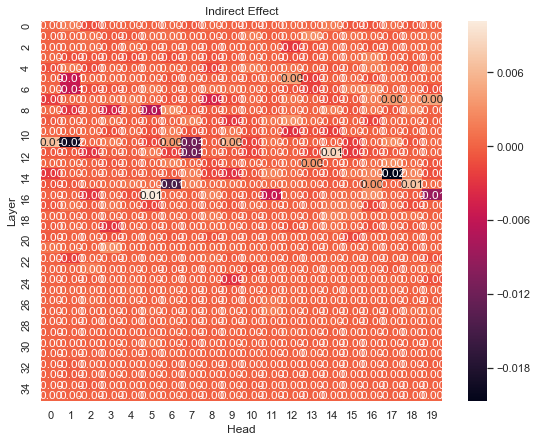

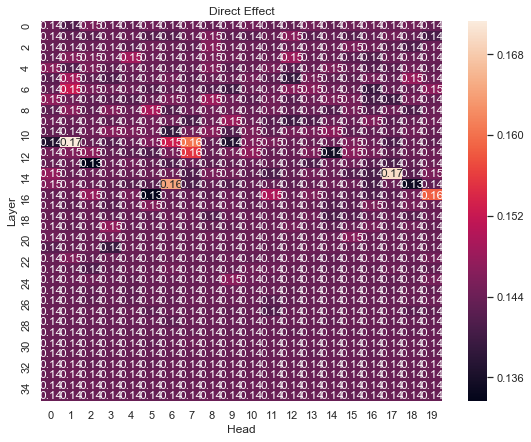

In [7]:
report_intervention(results[1])

x : The visitor asked the receptionist if she
x': The visitor asked the receptionist if he
c1: could estimate how long the wait would be .
c2: needed to sign in .

p(c2|x) / p(c1|x) = 0.59273
p(c2|x') / p(c1|x') = 1.07464

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.813


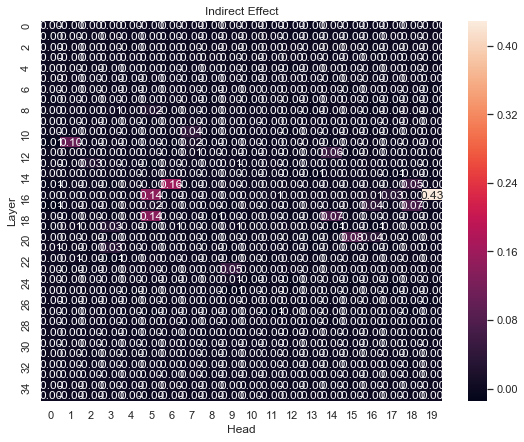

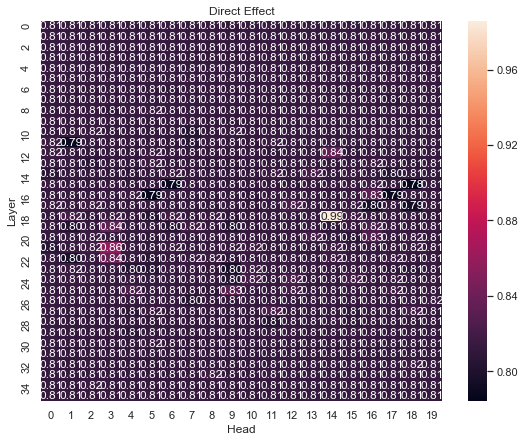

In [8]:
report_intervention(results[2])

x : The librarian helped the child pick out a book because she
x': The librarian helped the child pick out a book because he
c1: liked to encourage reading .
c2: did not know what to read .

p(c2|x) / p(c1|x) = 4.64232
p(c2|x') / p(c1|x') = 9.24006

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.990


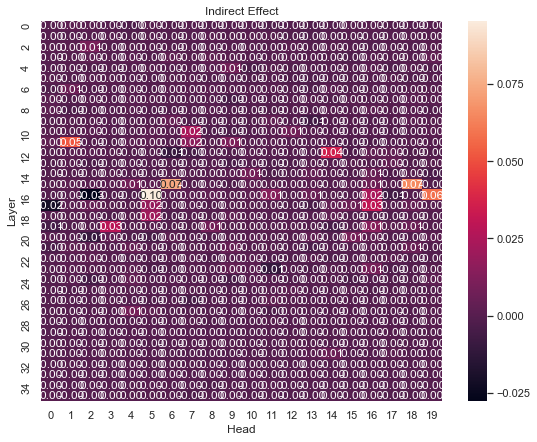

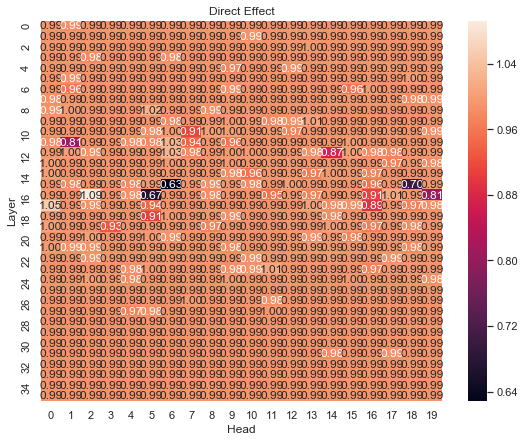

In [9]:
report_intervention(results[3])
